In [12]:
# -*- coding: utf8 -*-

#####################
#
#   Dados do Usuário
#
#####################

# Dimensão da Cela
# Azimute, em graus
z_step=5

#Afastamento, em metros
h_step=200

In [13]:
#####################
#
#   Inicio do Programa
#   Não alterar
#
#####################
%pylab inline
revision = !git rev-parse --short HEAD
print('Revision = %s'%revision)

rc('figure',figsize=(8,8))

h_max = 15000

n=10000
np.random.seed(1201)

#z_stepr = z_step*pi/180

z_bin = np.linspace(0,2*pi,(2*pi/np.radians(z_step)+1)
h_bin = np.linspace(0,h_max,(h_max/h_step)+1)

[Az,Os] = np.meshgrid(z_bin,h_bin)

SyntaxError: invalid syntax (<ipython-input-13-252a46f62d3e>, line 21)

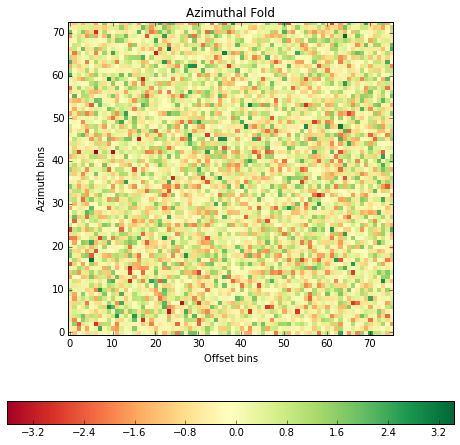

In [14]:
# Aleatorio para azimute e afastamento
randz = np.random.vonmises(120,0.5,n)
randh = np.random.randn(n)
#z=360*(abs(randz)/max(abs(randz)))
z = randz
h = h_max*(np.fabs(randh)/max(np.fabs(randh)))

# Bins preenchidos com ruido branco
X = np.random.randn(len(z_bin),len(h_bin))
#X = foz z,h in [z,h]

#xtick = np.linspace(0,h_max,16)
#ytick = np.linspace(0,360,9)

xtick = [0,2.5,5,7.5,10,12.5,15]
ytick = [0,45,90,135,180,225,270,315,360]

figure(1,figsize=(20,16))
fig, ax = plt.subplots()
im = ax.imshow(X, cmap = cm.RdYlGn, origin="lower", interpolation='nearest')
plt.colorbar(im,orientation='horizontal')
ax.set_title('Azimuthal Fold')
#ax.set_xticks(xtick)
#ax.set_yticks(ytick)
#ax.set_xticklabels(xtick)
#ax.set_yticklabels(ytick)
ax.set_ylabel('Azimuth bins')
ax.set_xlabel('Offset bins')


# numrows, numcols = X.shape
# def format_coord(x, y):
#     col = int(x+0.5)
#     row = int(y+0.5)
#     if col>=0 and col<numcols and row>=0 and row<numrows:
#         z = X[row,col]
#         return 'x=%1.4f, y=%1.4f, z=%1.4f'%(x, y, z)
#     else:
#         return 'x=%1.4f, y=%1.4f'%(x, y)
#
# ax.format_coord = format_coord
plt.show()

<matplotlib.contour.QuadContourSet instance at 0x111e30830>

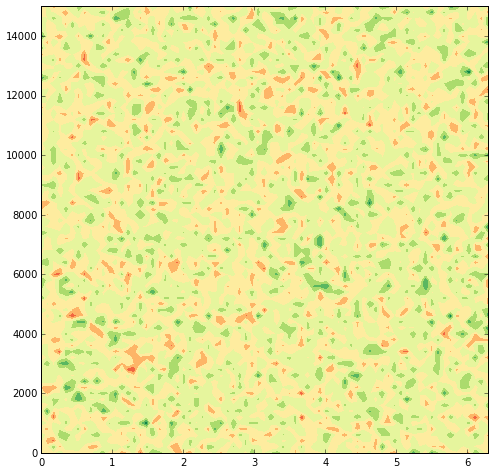

In [16]:
contourf(Az,Os,X.T,cmap=cm.RdYlGn)

In [ ]:
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(10,10))

axImage = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
# the Image plot:
axImage.imshow(X, cmap = cm.RdYlGn, origin="lower", interpolation='nearest')

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(z)), np.max(np.fabs(h))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

axImage.set_xlim( (-lim, lim) )
axImage.set_ylim( (-lim, lim) )

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(z, bins=bins)
axHisty.hist(h, bins=bins, orientation='horizontal')

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

In [ ]:
plt.figure(2,figsize=(12,12))
plt.subplot(111,polar=True)
plt.title(r'Bin location with $\theta$=%d, h=%d'%(z_step,h_step)
#im = ax.imshow(X, cmap = cm.RdYlBu, origin="lower", interpolation='nearest')
plt.plot(Az,Os,"k.")
plt.colorbar(im,orientation='horizontal')
#plt.bar(az2,fr2,width=width,bottom=0.0)
plt.hold()